In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('colheitas.csv', parse_dates=['date'])

### Replace missing values with Zero

In [4]:
df['nr'].fillna(value=0, inplace=True)

### Group data by month

<AxesSubplot:xlabel='date'>

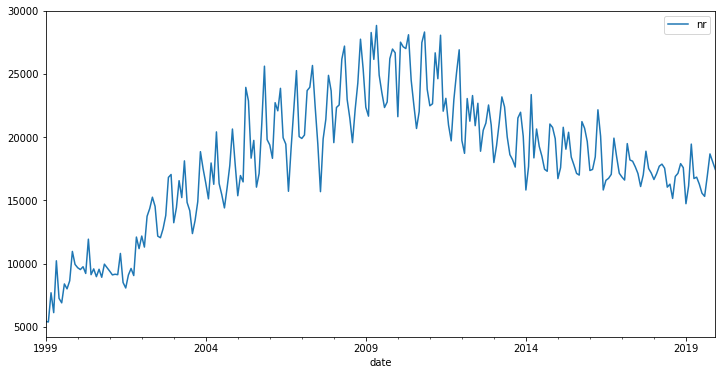

In [5]:
df=df.groupby('date').sum()
df=df.resample(rule='MS').sum()
df.plot(figsize=(12,6))

### Seasonal Decomposition

In [6]:
sns.set_style("darkgrid")
cm = 1/2.54 
colors = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

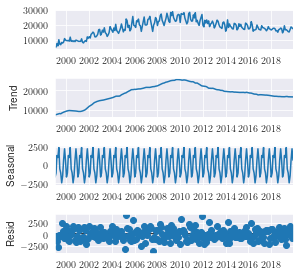

In [7]:
# Additive Decomposition
decomp_add = seasonal_decompose(df, model='additive', extrapolate_trend='freq')
fig = decomp_add.plot()
fig.set_size_inches((17/1.7*cm, 10*cm))
plt.savefig('figures/supply_decomp_add.pdf', bbox_inches = "tight")

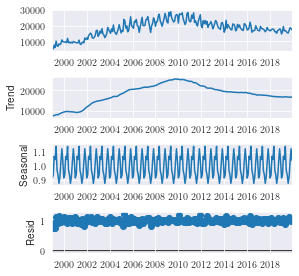

In [8]:
# MUL Decomposition
decomp_mul = seasonal_decompose(df, model='mul', extrapolate_trend='freq')
fig = decomp_mul.plot()
fig.set_size_inches((17/1.7*cm, 10*cm))
plt.savefig('figures/supply_decomp_mul.pdf', bbox_inches = "tight")

### Split Train and Test

In [9]:
train=df[:240] #1999 to 2018
test=df[240:]  #2019

### Train Model and Predict

In [23]:
hwmodel = ExponentialSmoothing(train.nr, trend='add', seasonal="mul", seasonal_periods=12).fit()
test_pred = hwmodel.forecast(12)

<AxesSubplot:xlabel='date'>

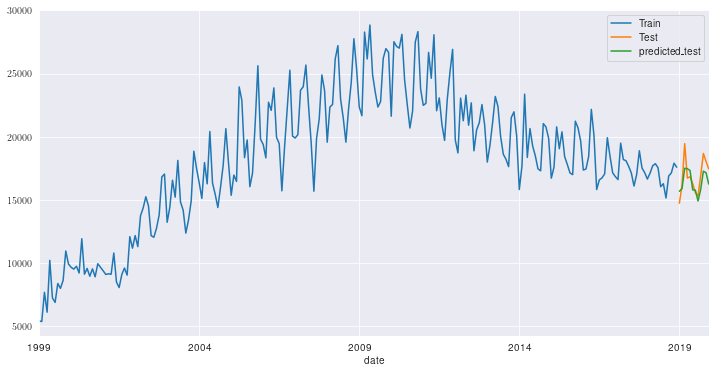

In [24]:
train['nr'].plot(legend=True, label='Train')
test['nr'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='predicted_test',figsize=(12,6))

### Calculate Error

In [25]:
np.sqrt(mean_squared_error(test, test_pred)),mean_absolute_error(test, test_pred)

(974.3196605031201, 838.6254939711897)

In [26]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [27]:
MAPE(test.nr, test_pred)

4.839827516783391

In [29]:
collection_pred_hw = test_pred
collection_test_set = test['nr']
collection_train_set = train['nr']
%store collection_pred_hw
%store collection_test_set
%store collection_train_set

Stored 'collection_pred_hw' (Series)
Stored 'collection_test_set' (Series)
Stored 'collection_train_set' (Series)


### Predict Next Months

<AxesSubplot:xlabel='date'>

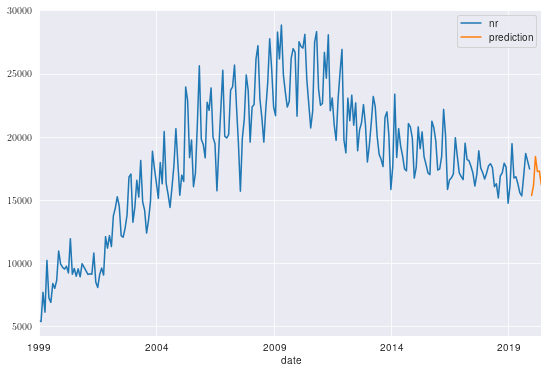

In [15]:
#Prediction Model
hwmodel = ExponentialSmoothing(df.nr, trend='add', seasonal="mul", seasonal_periods=12).fit()
pred=hwmodel.forecast(6)

df['nr'].plot(legend=True, label='nr')
pred.plot(legend=True, label='prediction', figsize=(9,6))